## Objective
Comparing behavior of train loss curves of keras_reitnanet with resnet50 backbone in the following cases:
<ul>
    <li>Backbone weights are initialized by pre-trained ImageNet weights, option --freeze-backbone not specified</li>
    <li>Backbone weights are initialized by pre-trained ImageNet weights, option --freeze-backbone is specified</li>
    <li>Backbone weights are initialized by pre-trained Standford Drone Dataset (SDD) weights, option --freeze-backbone not specified</li>
    <li>Backbone weights are initialized by pre-trained SDD weights, option --freeze-backbone is specified</li>
<ul>    

#### imagenet_nofreeze run command: 
keras_retinanet/bin/train.py --epoch 1 --steps 1000 --config config.ini --snapshot-path snapshots/weights_init/imagenet_nofreeze --tensorboard-dir logs/weights_init/imagenet_nofreeze --tensorboard-freq 10 pascal  ../data/laddv4/full

#### imagenet_freeze_backbone run command: 
keras_retinanet/bin/train.py --epoch 1 --steps 1000 --config config.ini --freeze-backbone --snapshot-path snapshots/weights_init/imagenet_freeze_backbone --tensorboard-dir logs/weights_init/imagenet_freeze_backbone --tensorboard-freq 10 pascal  ../data/laddv4/full

#### sdd_nofreeze run command: 
keras_retinanet/bin/train.py --epoch 1 --steps 1000 --snapshot snapshots/resnet50_base_best.h5 --snapshot-path snapshots/weights_init/sdd_nofreeze --config config.ini --tensorboard-dir logs/weights_init/sdd_nofreeze --tensorboard-freq 10 pascal  ../data/laddv4/full

#### sdd_freeze_backbone run command: 
keras_retinanet/bin/train.py --epoch 1 --steps 1000 --snapshot snapshots/resnet50_base_best.h5 --freeze-backbone --snapshot-path snapshots/weights_init/sdd_freeze_backbone --config config.ini --tensorboard-dir logs/weights_init/sdd_freeze_backbone --tensorboard-freq 10 --gpu 0 pascal  ../data/laddv4/full

## Resulting mAP
|               | SDD  | ImageNet |
|:--------------|------|----------|
|no-freeze      |0.6081|  0.1318  |
|freeze-backbone|0.4695|  0.0449  |

Considering mAP, that's look like SDD initial weights with no-freeze option is the best choice from the four.  

## Plotting training loss curves

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
from scipy.interpolate import interp1d

In [11]:
csv_dir = "./backbone_weights_csv"
loss_metrics = ['loss','classification_loss', 'regression_loss']
initializations = ['imagenet', 'sdd']
freeze_policies = ['nofreeze', 'freeze_backbone']

In [81]:
def load_metric_dataframes(csv_dir, metric):
    merged = pd.DataFrame()
    for init in initializations:
        for freeze in freeze_policies:
            curve = init + '_' + freeze
            filepath = os.path.join(csv_dir, metric, curve + '.csv')
            df = pd.read_csv(filepath)
            df = df[["Step", "Value"]]
            df.drop_duplicates('Step', keep = False, inplace = True)
            df = df.set_index('Step')
            df = df.rename(columns={"Value": curve})
            if merged.empty:
                merged = df
            else:
                merged = pd.merge(merged, df, left_index=True, right_index=True)
    return merged

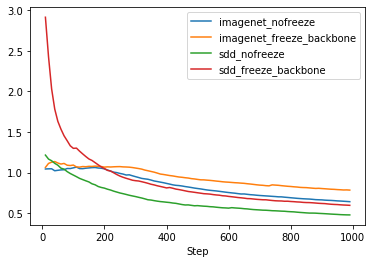

In [106]:
df = load_metric_dataframes(csv_dir, 'classification_loss')
df.plot()

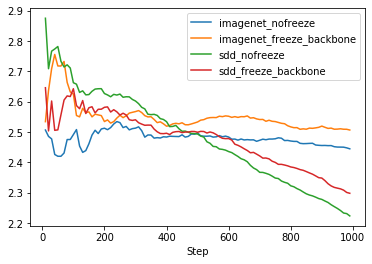

In [107]:
df = load_metric_dataframes(csv_dir, 'regression_loss')
df.plot()

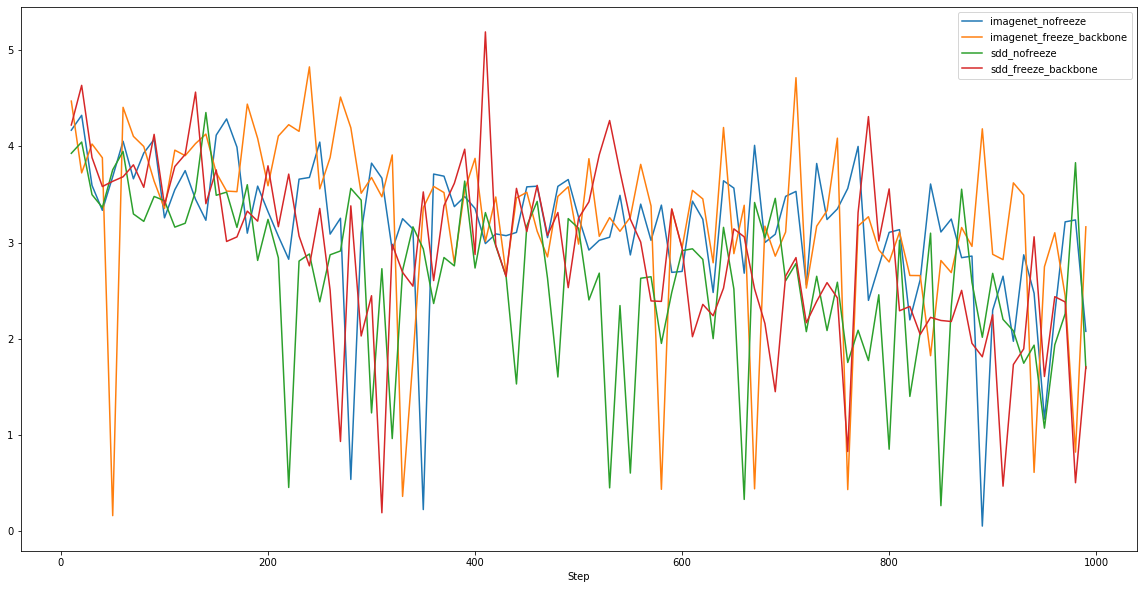

In [110]:
loss_df = load_metric_dataframes(csv_dir, 'loss')
loss_df.plot(figsize=(20, 10))

Quite a messy graph. Let's compare separately

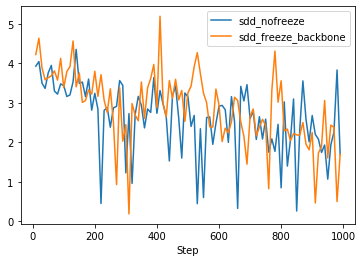

In [112]:
sdd_loss_df = loss_df[['sdd_nofreeze', 'sdd_freeze_backbone']]
sdd_loss_df.plot()

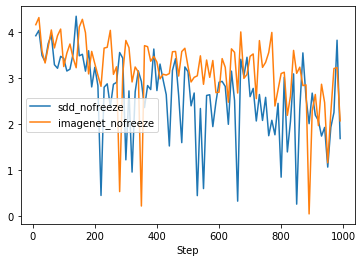

In [113]:
nofreeze_loss_df = loss_df[['sdd_nofreeze', 'imagenet_nofreeze']]
nofreeze_loss_df.plot()

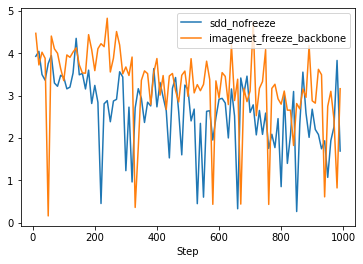

In [114]:
cross_loss_df = loss_df[['sdd_nofreeze', 'imagenet_freeze_backbone']]
cross_loss_df.plot()

The sdd_nofreeze curve seems to go lower than all the three other.

## Conclusion
The loss curves of training first 1000 steps and mAP metric after them shows that <b>SDD initial weights without --freeze-backbone</b> is the best option out of considered four.<br>
In general, run without --freeze-backbone option shows better result than with it, and SDD weight initialization in this task is better than Imagenet pre-trained weights.